In [35]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [41]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [34]:
train.corr()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
id,1.000000,0.153065,-0.008235,0.012590,0.014307,0.018708,0.006797,-0.029042,0.002226,-0.003022,-0.004223,0.020167,0.033674
day,0.153065,1.000000,0.005337,0.146294,0.153590,0.161475,0.137929,-0.074048,-0.048175,0.060936,0.024800,-0.000199,-0.000462
pressure,-0.008235,0.005337,1.000000,-0.800499,-0.816531,-0.814453,-0.817008,-0.119949,0.098600,-0.257163,-0.643293,0.266012,-0.049886
maxtemp,0.012590,0.146294,-0.800499,1.000000,0.982932,0.965529,0.906703,-0.072615,-0.289047,0.452387,0.662235,-0.354168,-0.079304
temparature,0.014307,0.153590,-0.816531,0.982932,1.000000,0.987150,0.933617,-0.025016,-0.249355,0.414019,0.668963,-0.342262,-0.049660
mintemp,0.018708,0.161475,-0.814453,0.965529,0.987150,1.000000,0.941342,0.009891,-0.219399,0.379497,0.663828,-0.328871,-0.026841
dewpoint,0.006797,0.137929,-0.817008,0.906703,0.933617,0.941342,1.000000,0.153390,-0.088446,0.249676,0.643073,-0.312179,0.081965
humidity,-0.029042,-0.074048,-0.119949,-0.072615,-0.025016,0.009891,0.153390,1.000000,0.584854,-0.541592,-0.012430,0.062285,0.454213
cloud,0.002226,-0.048175,0.098600,-0.289047,-0.249355,-0.219399,-0.088446,0.584854,1.000000,-0.805128,-0.127087,0.184698,0.641191
sunshine,-0.003022,0.060936,-0.257163,0.452387,0.414019,0.379497,0.249676,-0.541592,-0.805128,1.000000,0.272235,-0.241752,-0.555287


In [3]:
train.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


In [4]:
train.describe()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
count,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,1094.500000,179.948402,1013.602146,26.365799,23.953059,22.170091,20.454566,82.036530,75.721918,3.744429,104.863151,21.804703,0.753425
std,632.342866,105.203592,5.655366,5.654330,5.222410,5.059120,5.288406,7.800654,18.026498,3.626327,80.002416,9.898659,0.431116
min,0.000000,1.000000,999.000000,10.400000,7.400000,4.000000,-0.300000,39.000000,2.000000,0.000000,10.000000,4.400000,0.000000
25%,547.250000,89.000000,1008.600000,21.300000,19.300000,17.700000,16.800000,77.000000,69.000000,0.400000,40.000000,14.125000,1.000000
50%,1094.500000,178.500000,1013.000000,27.800000,25.500000,23.850000,22.150000,82.000000,83.000000,2.400000,70.000000,20.500000,1.000000
75%,1641.750000,270.000000,1017.775000,31.200000,28.400000,26.400000,25.000000,88.000000,88.000000,6.800000,200.000000,27.900000,1.000000
max,2189.000000,365.000000,1034.600000,36.000000,31.500000,29.800000,26.700000,98.000000,100.000000,12.100000,300.000000,59.500000,1.000000


In [27]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(train)
pca = PCA(n_components=train.shape[1]-1)  # Specify the number of components to retain
pca.fit(scaled_data)


PCA(n_components=12)

In [22]:
transformed_dta = pca.transform(scaled_data)

In [28]:
pca.explained_variance_ratio_

array([0.42611625, 0.20720479, 0.09028299, 0.06656136, 0.06529862,
       0.04251081, 0.03538687, 0.02760075, 0.01756596, 0.01342494,
       0.00528989, 0.0021283 ])

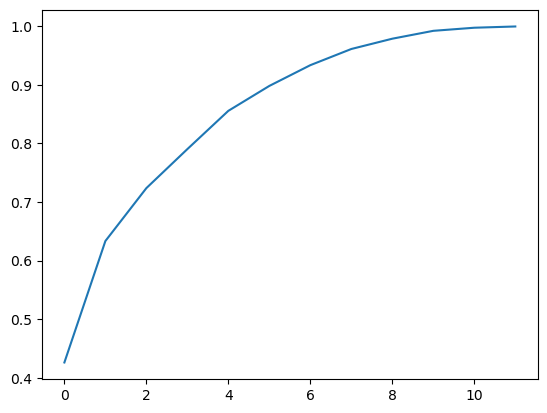

In [31]:
plt.plot((pca.explained_variance_ratio_.cumsum()))

In [9]:
pca.factors

,comp_00,comp_01,comp_02,comp_03,comp_04,comp_05,comp_06,comp_07,comp_08,comp_09,comp_10,comp_11
0,-0.014898,-0.012851,0.046856,-0.004389,0.011925,0.003235,0.006769,0.017083,0.000252,0.027359,-0.032304,0.000052
1,-0.030090,-0.020431,0.046655,-0.001977,0.008876,0.010080,-0.024513,0.009697,0.001488,0.019765,-0.038213,0.026638
2,-0.026435,0.043206,0.050194,-0.001680,0.004505,-0.004479,-0.028781,0.021993,-0.002059,-0.028584,-0.004959,-0.020691
3,-0.024963,-0.027790,0.042873,0.020856,-0.015649,0.017748,-0.015496,-0.022527,-0.003712,0.016622,-0.024008,0.006796
4,-0.025130,0.056493,0.043354,0.014019,-0.008139,-0.042206,0.059287,0.002079,0.050250,-0.029412,0.006692,0.024083
...,...,...,...,...,...,...,...,...,...,...,...,...
2185,-0.012528,-0.024318,-0.047344,-0.014600,0.013910,0.025652,-0.029517,-0.014239,0.009387,0.006740,0.024638,-0.008702
2186,-0.024361,-0.016945,-0.050102,0.005168,-0.009848,0.009267,-0.029217,-0.056622,0.009052,0.010576,-0.027046,0.016591
2187,-0.023861,0.012746,-0.048631,0.003823,-0.010583,-0.001961,-0.017994,-0.065973,-0.026486,-0.002362,0.019154,-0.002929
2188,-0.032383,-0.012443,-0.046933,-0.023591,0.023733,-0.004357,-0.038845,0.000554,-0.005413,0.024976,0.007950,0.007375


In [10]:
pca.eigenvals

0     12096.164390
1      4781.981595
2      2557.257033
3      1894.960167
4      1858.169971
5      1085.559615
6       886.798009
7       500.108008
8       389.332914
9       151.071321
10       60.702467
11       17.894510
Name: eigenvals, dtype: float64

In [37]:
base_log = LogisticRegression(max_iter=1000)
base_log.fit(scaled_data, train["rainfall"])
# base_log.fit(transformed_dta, train["target"])

LogisticRegression(max_iter=1000)

In [40]:
base_log.predict(scaled_data)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [39]:
base_log.score(scaled_data, train["rainfall"])

1.0

In [ ]:
scaler.fit_transform(test)
scaled_test_data = scaler.transform(test)
base_log.predict(scaled_test_data)
base_log.score(scaled_test_data, test["rainfall"])

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [51]:
np.isnan(scaled_test_data).sum()

1

In [ ]:
base_log.predict(scaled_test_data)